In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
class Point:
    def __init__(self, 
                 x_pos:float=None, 
                 y_pos:float=None, 
                 is_border:bool=False, 
                 is_airfoil:bool=False, 
                 U_infinity:float=30):
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.is_border = is_border
        self.is_airfoil = is_airfoil
        self.U_infinity = U_infinity
        self.streamline = 0
        self.del_streamline_del_x_value = 0
        self.del_streamline_del_y_value = 0
        #self.del_2_streamline_del_x_value = 0
        #self.del_2_streamline_del_y_value = 0
        
    def set_streamline(self, streamline):
        if self.is_airfoil:
            streamline = 0
        self.streamline = streamline
        
    def get_del_streamline_del_x(self):
        if self.is_border or self.is_airfoil:
            return 0
        return self.del_streamline_del_x_value
    
    def set_del_streamline_del_x(self, stream_line):
        if (not self.is_airfoil) and (not self.is_border):
            self.del_streamline_del_x_value = stream_line
    
    def get_del_streamline_del_y(self):
        if self.is_border:
            return self.U_infinity
        elif self.is_airfoil:
            return 0
        return self.del_streamline_del_y_value
    
    def set_del_streamline_del_y(self, stream_line):
        if (not self.is_airfoil) and (not self.is_border):
            self.del_streamline_del_y_value = stream_line
            
    
            
p = Point()

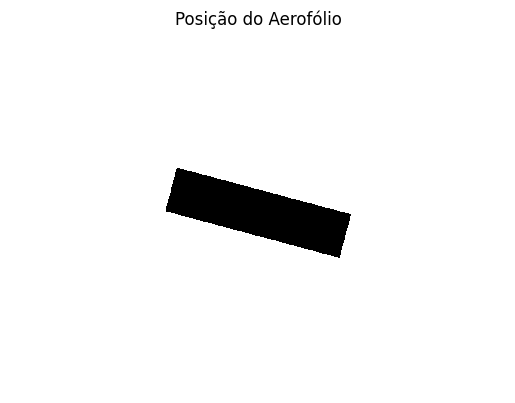

In [4]:
class Mesh:
    def __init__(self, delta:float = 0.01, rotation_angle:float=0):
        self.delta = delta
        self.lambda_value = 1.85
        self.tolerance = 0.01
        self.rotation_angle = rotation_angle*np.pi/180
        self._preprocess()
    
    def _preprocess(self):
        mesh_width = 11
        mesh_heigth = 8
        airfoil_width = 1
        airfoil_height = 4
        self.rotation_matrix = np.array([[-np.sin(self.rotation_angle), np.cos(self.rotation_angle)],
                                         [-np.cos(self.rotation_angle), -np.sin(self.rotation_angle)]])
        
        airfoil_center = np.array([mesh_width/2, mesh_heigth/2])
        new_system_center = self.rotation_matrix@airfoil_center        
        self.p1 = new_system_center + np.array([airfoil_width/2, airfoil_height/2]) 
        self.p2 = new_system_center + np.array([-airfoil_width/2, -airfoil_height/2]) 
        
        num_of_cols = int(mesh_width/self.delta)    
        num_of_rows = int(mesh_heigth/self.delta)    
        self.mesh = [[None]*num_of_cols for _ in range(num_of_rows)]
        for c in range(num_of_cols):
            for r in range(num_of_rows):
                new_x = self.delta * c
                new_y = self.delta * r
                new_point = Point(x_pos = new_x, y_pos = new_y)
                is_airfoil = self.is_in_airfoil(new_point)
                new_point.is_airfoil = is_airfoil
                if r == 0 or c == 0:
                    new_point.is_border = True
                self.mesh[r][c] = new_point
        
        
    def is_in_airfoil(self, point):
        x_pos = point.x_pos
        y_pos = point.y_pos
        position_in_new_system = self.rotation_matrix@np.array([x_pos, y_pos])
        new_x, new_y = position_in_new_system[0], position_in_new_system[1]
        in_x = (self.p1[0]>new_x and self.p2[0]<new_x)
        in_y = (self.p1[1]>new_y and self.p2[1]<new_y)
        if in_x and in_y:
            return True
        return False
    
    def plot_mesh(self):
        num_of_cols = len(self.mesh[0])    
        num_of_rows = len(self.mesh)    
        mesh = [[None]*num_of_cols for _ in range(num_of_rows)]
        for c in range(num_of_cols):
            for r in range(num_of_rows):
                point = self.mesh[r][c]
                mesh[r][c] = not point.is_airfoil
        plt.imshow(mesh, cmap='gray', interpolation='nearest')
        plt.title('Posição do Aerofólio')
        plt.axis('off')
        plt.show()

        
        
        
        
        
m = Mesh(rotation_angle=15, delta = 0.01)
mesh = m.mesh
m.plot_mesh()
